# Labo 4 : ACP sur des images

## Tâche 1

a. Que contient la structure de données retournée par datasets.fetch_olivetti_faces() ?

In [84]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
print(faces.DESCR)

print("shape of faces:")

faces.pop('DESCR')

for i in faces.keys():
    print(i, faces.get(i).shape)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

l'objet ``faces`` contient:
1. `data` : 400 listes de 4096 points de 0 à 1 représentant les pixels des images des personnes
2. `images` : 400 listes à deux dimensions de 64x64 points de 0 à 1 représentant les pixels des images des personnes
3. `target` : 400 identifiants qui indiquent à quelles personnes les images correspondent.


b. Combien de personnes sont représentées ? Combien d’images par personne ?

La description nous indique que les images des personnes appartiennent à 40 personnes différentes, notées de 1 à 39 dans l'attribut `target`.

c. Quelle est la taille des images ? Comment sont-elles codées ? Y a-t-il une duplication ?

dans `data` c'est un vecteur de points de 0 à 1, et dans `images` c'est un vecteur bi-dimensionnel de 64x64 points.

Les valeurs des pixels sont les mêmes dans `data` et `images`, simplement organisées d'une façon différente.

d. Veuillez afficher une image extraite des données.

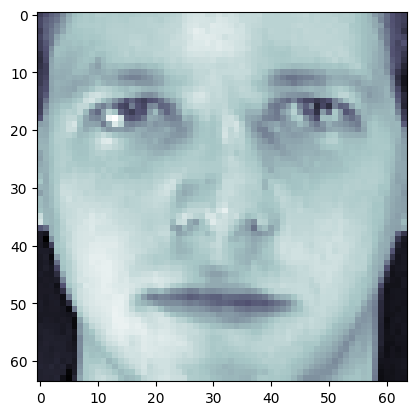

In [85]:
from matplotlib import pyplot as plt

plt.imshow(faces.images[0], cmap=plt.cm.bone)

## Tâche 2



In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    faces.data,
    faces.target,
    test_size=0.2,
    stratify=faces.target,
    random_state=42
)

print("dimensions des jeux:")
print("Train: ",x_train.shape)
print("Test: ",x_test.shape)

dimensions des jeux:
Train:  (320, 4096)
Test:  (80, 4096)


## Tâche 3

fit...
pred...
accuracy score of classifier KNN: 0.7375
fit...
pred...
accuracy score of classifier SVM: 0.975
fit...
pred...
accuracy score of classifier Logistic Regression: 0.975
{'KNN': {'object': KNeighborsClassifier(metric='cosine'), 'accuracy': 0.7375}, 'SVM': {'object': SVC(C=1, kernel='linear'), 'accuracy': 0.975}, 'Logistic Regression': {'object': LogisticRegression(solver='liblinear'), 'accuracy': 0.975}}


Text(0.5, 1.0, 'Comparaison des 3 classifiers sans ACP')

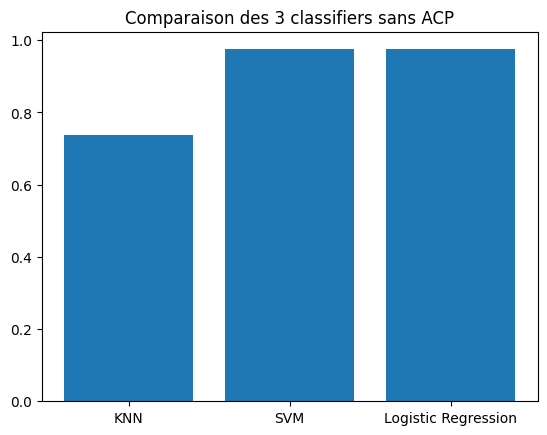

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine')},
    'SVM': {"object": SVC(C=1, kernel="linear")},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear')}}

for name, classifier in classifiers.items():
    print('fit...')
    classifier["object"].fit(x_train, y_train)

    print('pred...')
    y_pred = classifier["object"].predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"accuracy score of classifier {name}: {acc}")
    classifier["accuracy"] = acc
    acc = 0

print(classifiers)
plt.bar(classifiers.keys(), [v["accuracy"] for v in classifiers.values()])
plt.title("Comparaison des 3 classifiers sans ACP")

## Tâche 4

décomposition en 150 PCA.
dimensions des eigenfaces:
(150, 4096)
visualisation des 30 premières eigenfaces
réduction de dimension des jeux de train et test
dimensions des jeux réduits en dimension:
nouvelle dimension du jeu de train:  (320, 150)
nouvelle dimension du jeu de test:  (80, 150)


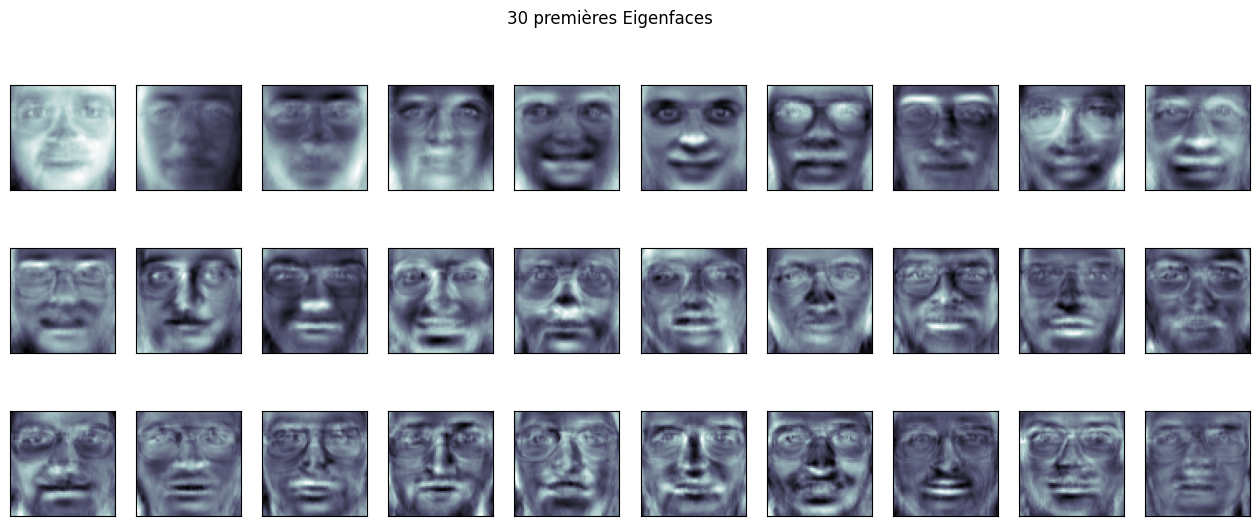

In [88]:
from sklearn import decomposition

print("décomposition en 150 PCA.")

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(x_train)

print("dimensions des eigenfaces:")
print(pca.components_.shape)

print("visualisation des 30 premières eigenfaces")
fig = plt.figure(figsize=(16, 6))
fig.suptitle('30 premières Eigenfaces')
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    

print("réduction de dimension des jeux de train et test")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("dimensions des jeux réduits en dimension:")
print("nouvelle dimension du jeu de train: ", x_train_pca.shape)
print("nouvelle dimension du jeu de test: ", x_test_pca.shape)



> Devez-vous centrer les données avant d’appliquer l’ACP ?

Non, car selon la documentation de sklearn, PCA applique automatiquement un centrage avant d'appliquer la redimension.

### Visualisation d'ACP à différents nombres de PCA

#### Sur les données d'entraînement

25
50
75
100
125
150


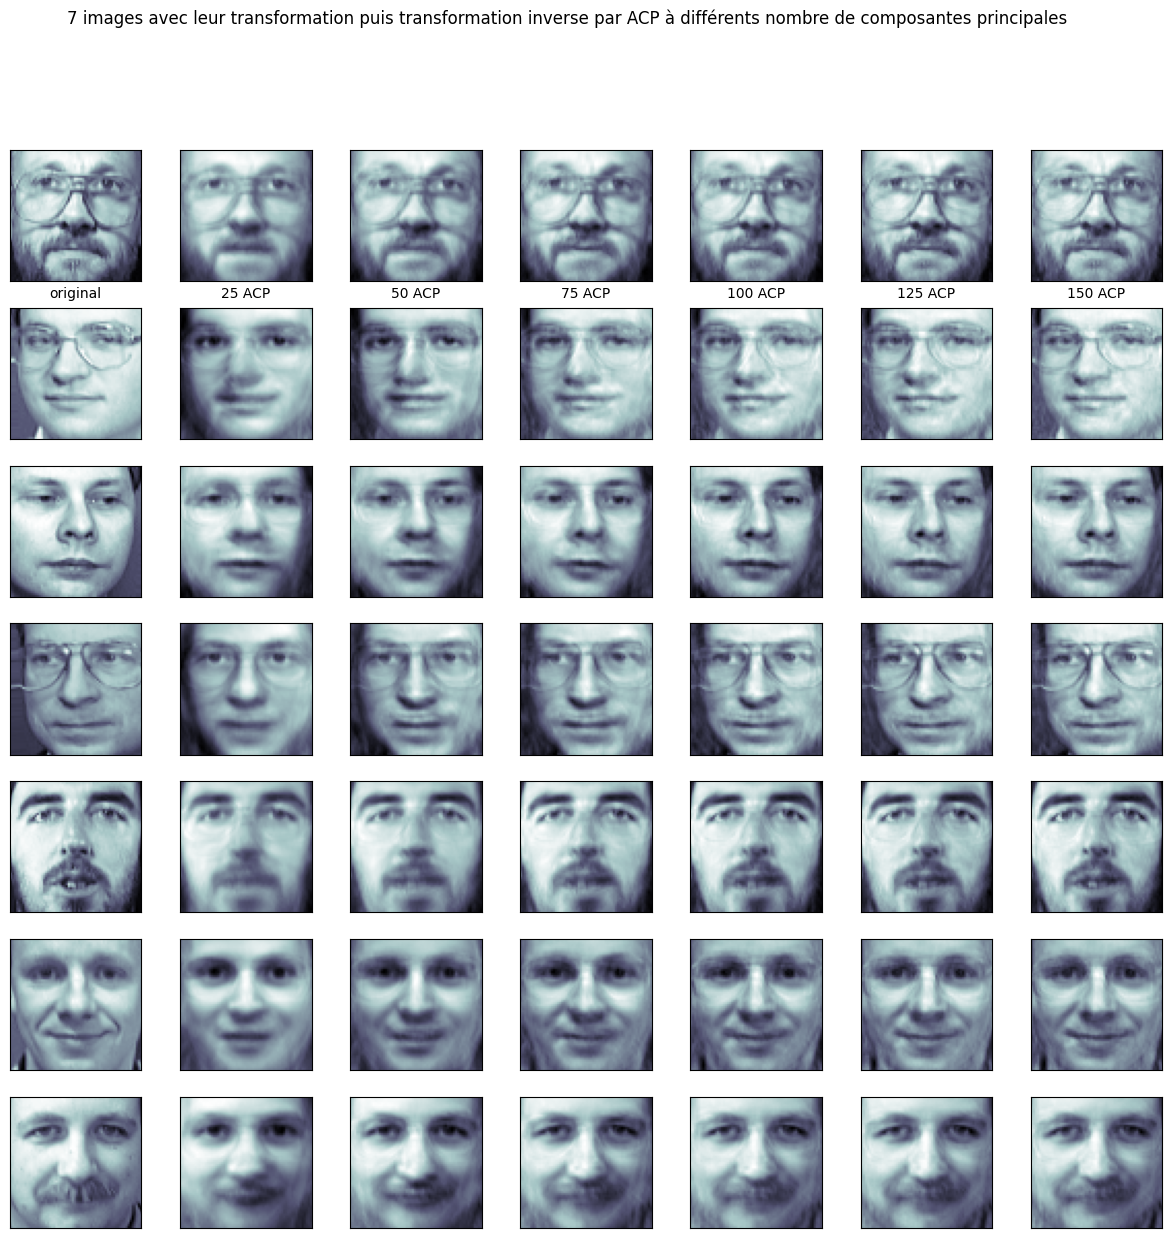

In [89]:
pcanb = 6
facenb = 7

fig = plt.figure(figsize=((pcanb-1)*3, facenb*2))
gs = fig.add_gridspec(facenb, 1)
fig.suptitle(str(facenb) + " images avec leur transformation puis transformation inverse par ACP à différents nombre de composantes principales")
gss = []

for i in range(pcanb):

    featNb = (i+1)*25

    print(featNb)

    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
        
    train_pca = pca.transform(x_train)

    train_invert_pca = pca.inverse_transform(train_pca)

    for k in range(facenb):
        
        if(i == 0):
            gss.append(gs[k].subgridspec(1, pcanb+1))

            ax = fig.add_subplot(gss[k][0], xticks=[], yticks=[], xlabel='original' if k == 0  else None)
            ax.imshow(x_train[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)
            
        ax = fig.add_subplot(gss[k][i+1], xticks=[], yticks=[], xlabel=str(featNb) + ' ACP' if k == 0  else None)
        ax.imshow(train_invert_pca[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)

#### Sur les données de test

25
50
75
100
125
150


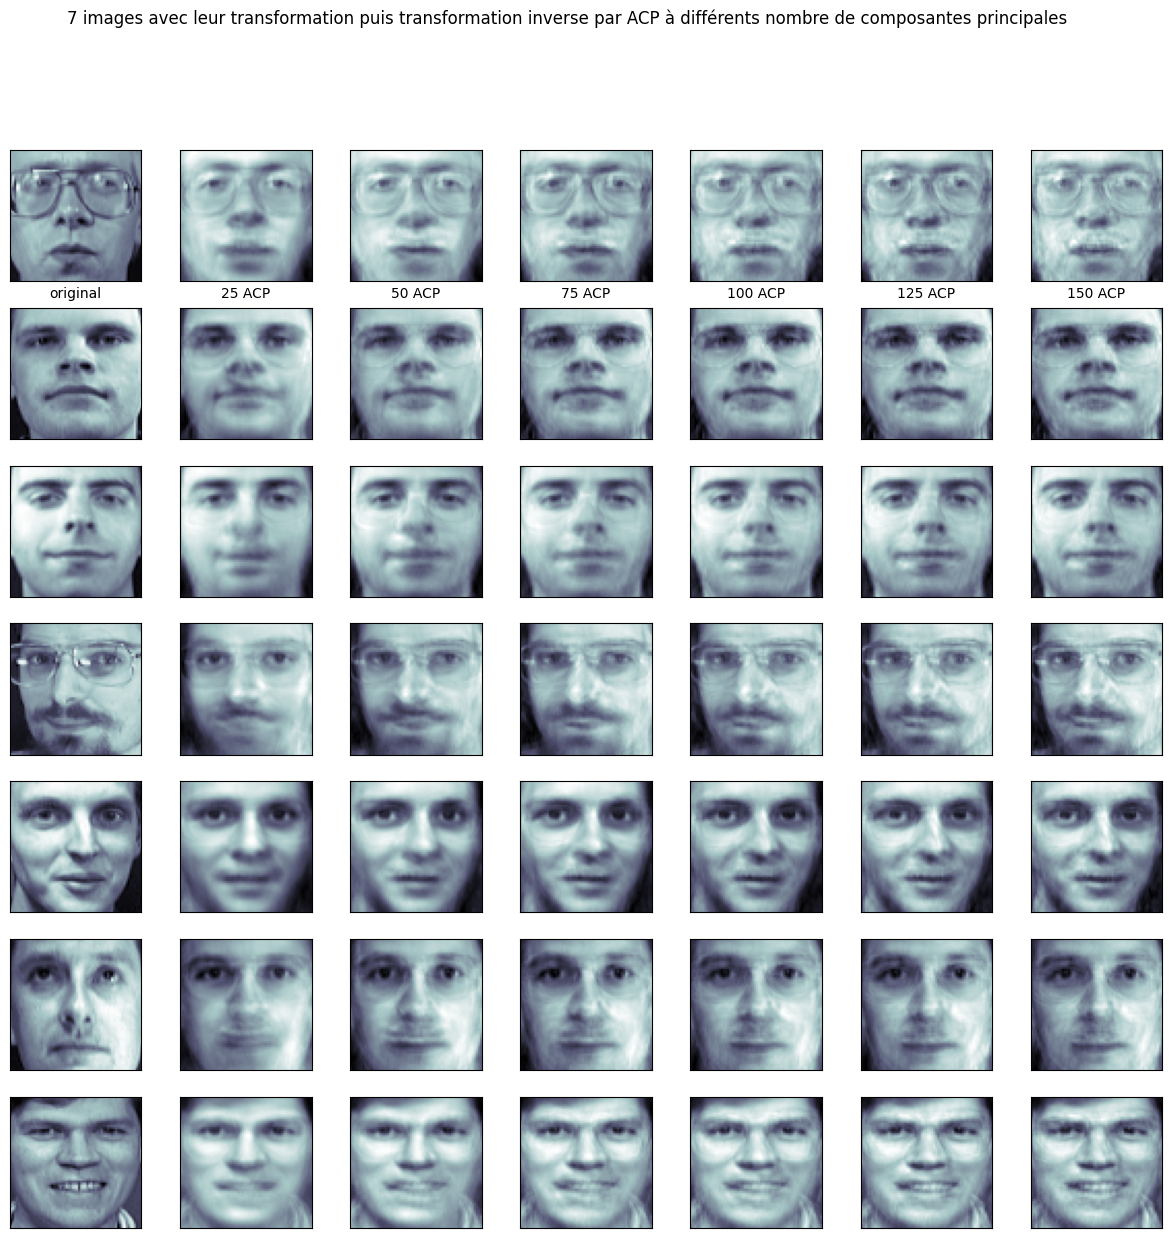

In [90]:
pcanb = 6
facenb = 7

fig = plt.figure(figsize=((pcanb-1)*3, facenb*2))
gs = fig.add_gridspec(facenb, 1)
fig.suptitle(str(facenb) + " images avec leur transformation puis transformation inverse par ACP à différents nombre de composantes principales")
gss = []

for i in range(pcanb):

    featNb = (i+1)*25

    print(featNb)

    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
        
    test_pca = pca.transform(x_test)

    test_invert_pca = pca.inverse_transform(test_pca)

    for k in range(facenb):
        
        if(i == 0):
            gss.append(gs[k].subgridspec(1, pcanb+1))

            ax = fig.add_subplot(gss[k][0], xticks=[], yticks=[], xlabel='original' if k == 0  else None)
            ax.imshow(x_test[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)
            
        ax = fig.add_subplot(gss[k][i+1], xticks=[], yticks=[], xlabel=str(featNb) + ' ACP' if k == 0  else None)
        ax.imshow(test_invert_pca[k].reshape(faces.images[0].shape), cmap=plt.cm.bone)

On peut voir la qualité de la conservation des propriétés de chaque image après la réduction dimensionnelle ACP,
Si on applique ACP sur le dataset de train, on arrive assez vite (~100 ACP) à une reproduction presque parfaite de l'image originale
si on applique ACP sur le dataset de test avec 150 composantes principales, on a arrive à un niveau détail à peu près satisfaisant, et un nombre plus élevé de features ne change quasiment rien au résultat

## Tâche 5

fit...
pred...
accuracy score of classifier KNN: 0.95
fit...
pred...
accuracy score of classifier SVM: 0.9875
fit...
pred...
accuracy score of classifier Logistic Regression: 0.9875
{'KNN': {'object': KNeighborsClassifier(metric='cosine'), 'accuracy': 0.95}, 'SVM': {'object': SVC(C=1, kernel='linear'), 'accuracy': 0.9875}, 'Logistic Regression': {'object': LogisticRegression(solver='liblinear'), 'accuracy': 0.9875}}


Text(0.5, 1.0, 'Comparaison des 3 classifiers avec ACP(150 feats.)')

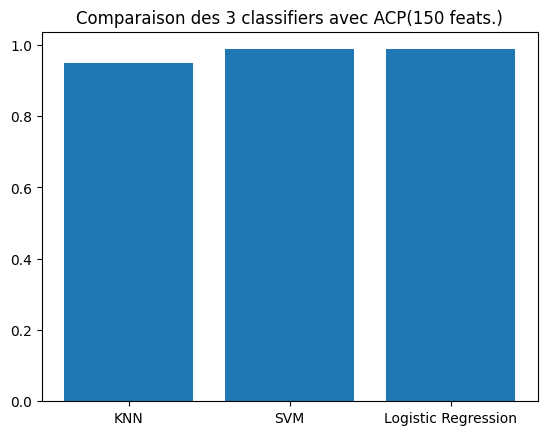

In [91]:
classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine')},
    'SVM': {"object": SVC(C=1, kernel="linear")},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear')}}

for name, classifier in classifiers.items():
    print('fit...')
    classifier["object"].fit(x_train_pca, y_train)

    print('pred...')
    y_pred = classifier["object"].predict(x_test_pca)

    acc = accuracy_score(y_test, y_pred)

    print(f"accuracy score of classifier {name}: {acc}")
    classifier["accuracy"] = acc
    acc = 0

print(classifiers)
plt.bar(classifiers.keys(), [v["accuracy"] for v in classifiers.values()])
plt.title("Comparaison des 3 classifiers avec ACP(150 feats.)")

## Tâche 6

In [92]:
classifiers = {
    "KNN": {"object": KNeighborsClassifier(n_neighbors=5, metric='cosine'), "accuracy": []},
    'SVM': {"object": SVC(C=1, kernel="linear"), "accuracy": []},
    'Logistic Regression': {"object": LogisticRegression(solver='liblinear'), "accuracy": []}}

for i in range(15):

    featNb = (i+1)*10

    print(featNb)

    pca = decomposition.PCA(n_components=featNb, whiten=True)

    pca.fit(x_train)
        
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    for name, classifier in classifiers.items():
        classifier["object"].fit(x_train_pca, y_train)

        y_pred = classifier["object"].predict(x_test_pca)

        acc = accuracy_score(y_test, y_pred)

        classifier["accuracy"].append(acc)
        
        acc = 0

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


[0.7625, 0.8625, 0.8875, 0.9125, 0.925, 0.9375, 0.9375, 0.9125, 0.9375, 0.925, 0.925, 0.9375, 0.9375, 0.925, 0.925]
[0.925, 0.95, 0.95, 0.975, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]
[0.7875, 0.9, 0.9375, 0.925, 0.975, 0.9875, 0.975, 0.975, 0.975, 0.975, 0.975, 0.9875, 0.9875, 0.9875, 0.9875]


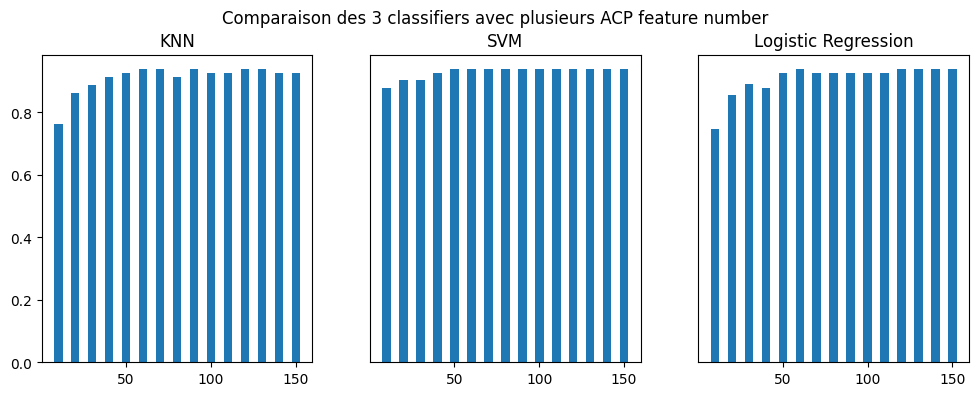

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle("Comparaison des 3 classifiers avec plusieurs ACP feature number")
plt.tight_layout()

for i, (name, classifier) in enumerate(classifiers.items()):
    print(classifier["accuracy"])
    axs[i].bar(
        [(i + 1) * 10 for i in range(len(classifier["accuracy"]))],
        [v for v in classifier["accuracy"]],
        width=5
    )

    axs[i].set_title(name)

    if i > 0:
        axs[i].set_yticks([]) 

In [94]:
import numpy as np

for (name, classifier) in classifiers.items():
    print(f"best ACP feature number accuracy for {name}: {(np.argmax(classifier["accuracy"]) + 1) * 10} = {np.max(classifier["accuracy"])}")

best ACP feature number accuracy for KNN: 60 = 0.9375
best ACP feature number accuracy for SVM: 50 = 0.9875
best ACP feature number accuracy for Logistic Regression: 60 = 0.9875


## Tâche 7

## Tâche 8